In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('spam.csv', encoding='latin1')

In [3]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
# Data cleaning
# EDA
# Text preprocessing
# Model building

# Data Cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


# Dropping last 3 columns as it does not contian any value or very least values

In [7]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace = True)

In [8]:
df.sample(5)

,v1,v2
2764,ham,Open rebtel with firefox. When it loads just p...
3415,ham,Uhhhhrmm isnt having tb test bad when youre sick
3809,ham,"Aight, can you text me the address?"
3842,ham,Yes ammae....life takes lot of turns you can o...
5533,ham,"Hey chief, can you give me a bell when you get..."


# Renaming the columns as they are not descriptive

In [9]:
df.rename(columns={'v1':'Target','v2':'Text'},inplace = True)
df.sample(5)

,Target,Text
2942,ham,No message..no responce..what happend?
1355,ham,Convey my regards to him
2403,ham,Jesus christ bitch I'm trying to give you drug...
1727,ham,I went to project centre
4144,ham,Lol I would but despite these cramps I like be...


In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
encoder = LabelEncoder()

In [12]:
encoder.fit_transform(df['Target'])
# ham = 0
# spam = 1

array([0, 0, 1, ..., 0, 0, 0])

In [13]:
df['Target'] = encoder.fit_transform(df['Target'])

In [14]:
df.sample(5)

,Target,Text
4762,0,Prepare to be pleasured :)
3923,0,How? Izzit still raining?
4120,0,Yunny... I'm goin to be late
3050,0,Awesome question with a cute answer: Someone a...
2496,0,HCL chennai requires FRESHERS for voice proces...


# Checking missing values

In [15]:
df.isnull().sum()

Target    0
Text      0
dtype: int64

# Check duplicate values

In [16]:
df.duplicated().sum()

np.int64(403)

# Remove duplicates

In [17]:
df = df.drop_duplicates(keep='first')

In [18]:
df.duplicated().sum()

np.int64(0)

In [19]:
df.shape

(5169, 2)

# EDA

In [20]:
df.head()

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [21]:
# checking how many spam and ham are present in datq
df['Target'].value_counts()

Target
0    4516
1     653
Name: count, dtype: int64

In [22]:
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

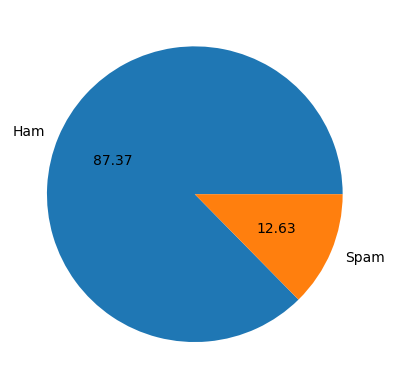

In [23]:
plt.pie(df['Target'].value_counts(),labels = ['Ham','Spam'], autopct='%0.2f')
plt.show

In [24]:
# Data is imbalanced because ham and spam are not balanced

In [25]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import nltk
nltk.download('punkt')

In [26]:
import nltk

In [27]:
# num of characters
df['num_of_chars'] = df['Text'].apply(len)

C:\Users\AJAY BANGAR\AppData\Local\Temp\ipykernel_4612\804689720.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_of_chars'] = df['Text'].apply(len)


In [28]:
df.sample(5)

,Target,Text,num_of_chars
1800,0,excellent. I spent &lt;#&gt; years in the Ai...,123
3852,0,"Dont worry, 1 day very big lambu ji vl come..t...",77
4313,0,Is ur changes 2 da report big? Cos i've alread...,82
3524,0,I not free today i haf 2 pick my parents up to...,53
2356,0,No..he joined today itself.,27


In [29]:
# num of words
df['num_of_words'] = df['Text'].apply(lambda x: len(nltk.word_tokenize(x)))

C:\Users\AJAY BANGAR\AppData\Local\Temp\ipykernel_4612\2464149275.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_of_words'] = df['Text'].apply(lambda x: len(nltk.word_tokenize(x)))


In [30]:
df.sample(5)

,Target,Text,num_of_chars,num_of_words
2280,0,R Ì_ comin back for dinner?,27,7
1979,0,Shhhhh nobody is supposed to know!,34,7
2654,0,Its sarcasm.. .nt scarcasim,27,5
1284,0,But if she.s drinkin i'm ok.,28,8
64,0,Ok lar i double check wif da hair dresser alre...,110,26


In [31]:
# Number of sentences
df['num_of_sent'] = df['Text'].apply(lambda x: len(nltk.sent_tokenize(x)))

C:\Users\AJAY BANGAR\AppData\Local\Temp\ipykernel_4612\3145350066.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_of_sent'] = df['Text'].apply(lambda x: len(nltk.sent_tokenize(x)))


In [32]:
df.sample(5)

,Target,Text,num_of_chars,num_of_words,num_of_sent
4798,0,I dont know why she.s not getting your messages,47,9,1
705,0,I don't think I can get away for a trek that l...,76,19,1
3256,0,"No, but you told me you were going, before you...",57,15,1
1481,0,"I'm a guy, browsin is compulsory",32,8,1
3075,0,"Mum, hope you are having a great day. Hoping t...",112,27,4


In [33]:
df[['num_of_chars','num_of_words','num_of_sent']].describe()

,num_of_chars,num_of_words,num_of_sent
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [34]:
# analyzing ham and spam separatly

In [35]:
# ham
df[df['Target'] == 0][['num_of_chars','num_of_words','num_of_sent']].describe() 

,num_of_chars,num_of_words,num_of_sent
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [36]:
# Spam
df[df['Target'] == 1][['num_of_chars','num_of_words','num_of_sent']].describe() 

,num_of_chars,num_of_words,num_of_sent
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [37]:
# Plotting histogram for both spam and ham

In [38]:
import seaborn as sns

<Axes: xlabel='num_of_chars', ylabel='Count'>

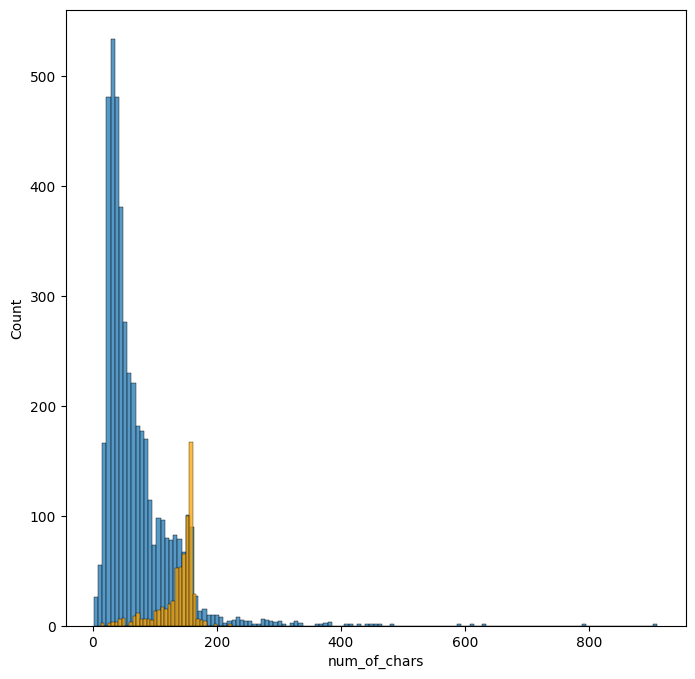

In [39]:
plt.figure(figsize=(8,8))
sns.histplot(df[df['Target'] == 0]['num_of_chars'])
sns.histplot(df[df['Target'] == 1]['num_of_chars'],color = 'Orange')

<Axes: xlabel='num_of_words', ylabel='Count'>

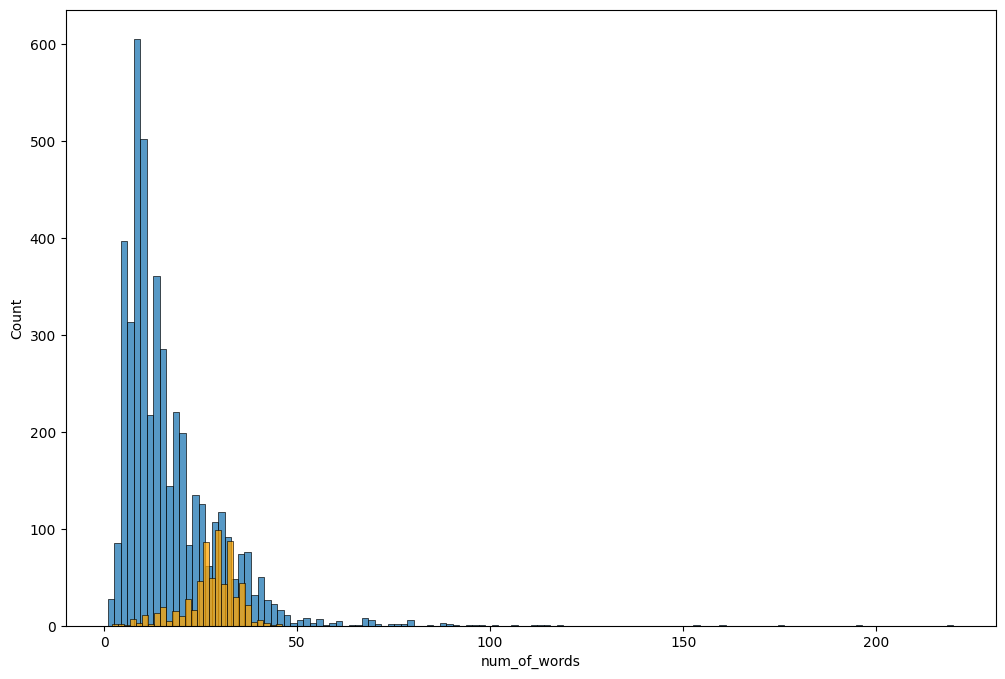

In [40]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['Target'] == 0]['num_of_words'])
sns.histplot(df[df['Target'] == 1]['num_of_words'],color = 'Orange')
# ham = 0
# spam = 1

In [41]:
df[['Target','num_of_chars','num_of_words','num_of_sent']].corr()

,Target,num_of_chars,num_of_words,num_of_sent
Target,1.000000,0.384717,0.262912,0.263939
num_of_chars,0.384717,1.000000,0.965760,0.624139
num_of_words,0.262912,0.965760,1.000000,0.679971
num_of_sent,0.263939,0.624139,0.679971,1.000000


<Axes: >

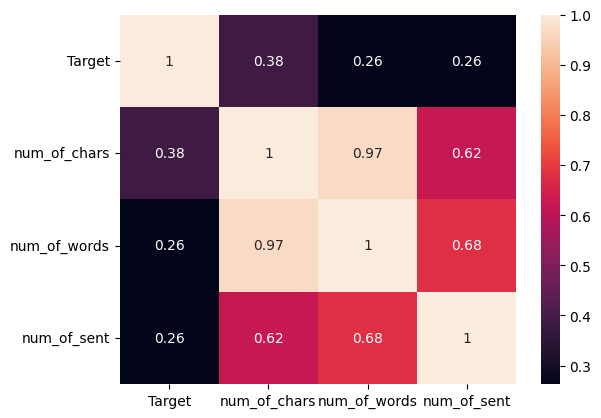

In [42]:
sns.heatmap(df[['Target','num_of_chars','num_of_words','num_of_sent']].corr(),annot=True)

# Data Preprocessing
##### - Lower case
##### - Tokenization
##### - Removing Special Chars
##### - Removing stop words and punctuation
##### - Stemming

In [43]:
def transform_text(text):
    text = text.lower()
    return text

In [44]:
transform_text('HI HOW ARE YOU')

'hi how are you'

In [45]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    return text

In [46]:
transform_text('HI HOW ARE YOU')

['hi', 'how', 'are', 'you']

In [47]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y=[]
    for i in text:
        if i.isalnum(): # is aplha numeric
            y.append(i)
            
    return y

In [48]:
transform_text('HI HOW ARE YOU %%')

['hi', 'how', 'are', 'you']

In [49]:
from nltk.corpus import stopwords

In [50]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\AJAY
[nltk_data]     BANGAR\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [51]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [52]:
import string

In [53]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [54]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y=[]
    for i in text:
        if i.isalnum(): # is aplha numeric
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    return y

In [55]:
transform_text('HI HOW ARE YOU %% ?a ajay ')

['hi', 'ajay']

In [56]:
transform_text('did you like my presentation on ml ?')

['like', 'presentation', 'ml']

In [57]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('Dancing')

'danc'

In [58]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y=[]
    for i in text:
        if i.isalnum(): # is aplha numeric
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))
            
    return ' '.join(y)

In [59]:
# checking our fuction is working properly or not
transform_text('I loved the lecture on ML, How about you ?')

'love lectur ml'

In [60]:
# adding new column of transformed text
df['Transformed_text'] = df['Text'].apply(transform_text)

C:\Users\AJAY BANGAR\AppData\Local\Temp\ipykernel_4612\111304218.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Transformed_text'] = df['Text'].apply(transform_text)


In [61]:
df.head()

,Target,Text,num_of_chars,num_of_words,num_of_sent,Transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [62]:
# creating wordcloud

In [63]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: wordcloud in c:\users\ajay bangar\appdata\local\programs\python\python312\lib\site-packages (1.9.4)




[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [64]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [65]:
spam_wc = wc.generate(df[df['Target']==1]['Transformed_text'].str.cat(sep=' '))

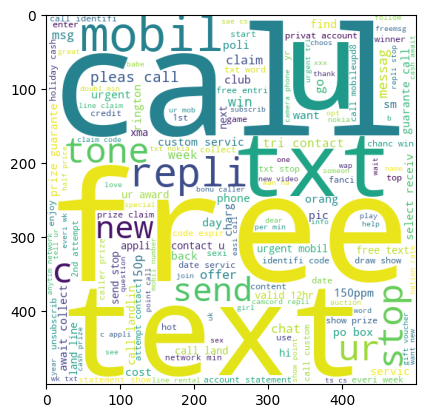

In [66]:
plt.imshow(spam_wc)

In [67]:
ham_wc = wc.generate(df[df['Target']==0]['Transformed_text'].str.cat(sep=' '))

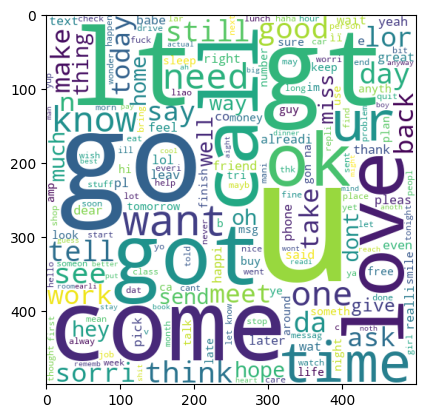

In [68]:
plt.imshow(ham_wc)

In [69]:
# Top 30 words of spam and ham

In [70]:
for msg in df[df['Target'] == 1]['Transformed_text'].tolist():
    print(msg)

free entri 2 wkli comp win fa cup final tkt 21st may text fa 87121 receiv entri question std txt rate c appli 08452810075over18
freemsg hey darl 3 week word back like fun still tb ok xxx std chg send rcv
winner valu network custom select receivea prize reward claim call claim code kl341 valid 12 hour
mobil 11 month u r entitl updat latest colour mobil camera free call mobil updat co free 08002986030
six chanc win cash 100 pound txt csh11 send cost 6day tsandc appli repli hl 4 info
urgent 1 week free membership prize jackpot txt word claim 81010 c lccltd pobox 4403ldnw1a7rw18
xxxmobilemovieclub use credit click wap link next txt messag click http
england v macedonia dont miss news txt ur nation team 87077 eg england 87077 tri wale scotland poboxox36504w45wq
thank subscript rington uk mobil charg pleas confirm repli ye repli charg
07732584351 rodger burn msg tri call repli sm free nokia mobil free camcord pleas call 08000930705 deliveri tomorrow
sm ac sptv new jersey devil detroit red wi

In [71]:
spam_corpus = []
for msg in df[df['Target'] == 1]['Transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [72]:
spam_corpus

['free',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'appli',
 '08452810075over18',
 'freemsg',
 'hey',
 'darl',
 '3',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 'rcv',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 'prize',
 'reward',
 'claim',
 'call',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'mobil',
 '11',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'mobil',
 'updat',
 'co',
 'free',
 '08002986030',
 'six',
 'chanc',
 'win',
 'cash',
 '100',
 'pound',
 'txt',
 'csh11',
 'send',
 'cost',
 '6day',
 'tsandc',
 'appli',
 'repli',
 'hl',
 '4',
 'info',
 'urgent',
 '1',
 'week',
 'free',
 'membership',
 'prize',
 'jackpot',
 'txt',
 'word',
 'claim',
 '81010',
 'c',
 'lccltd',
 'pobox',
 '4403ldnw

In [73]:
len(spam_corpus)

9939

In [74]:
from collections import Counter
Counter(spam_corpus)

Counter({'call': 320,
         'free': 191,
         '2': 155,
         'txt': 141,
         'text': 122,
         'u': 119,
         'ur': 119,
         'mobil': 114,
         'stop': 104,
         'repli': 103,
         'claim': 98,
         '4': 97,
         'prize': 82,
         'get': 74,
         'new': 64,
         'servic': 64,
         'tone': 63,
         'send': 60,
         'urgent': 57,
         'nokia': 57,
         'contact': 56,
         'award': 55,
         'phone': 52,
         'cash': 51,
         'pleas': 51,
         'week': 49,
         'win': 48,
         'c': 45,
         'collect': 45,
         'min': 45,
         'custom': 42,
         'messag': 42,
         'guarante': 42,
         'per': 41,
         'chat': 38,
         'tri': 37,
         'msg': 35,
         'draw': 35,
         'number': 35,
         'cs': 35,
         'show': 33,
         'today': 33,
         'offer': 33,
         'line': 33,
         'go': 32,
         'receiv': 31,
         'want': 3

In [75]:
pd.DataFrame(Counter(spam_corpus).most_common(30))

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


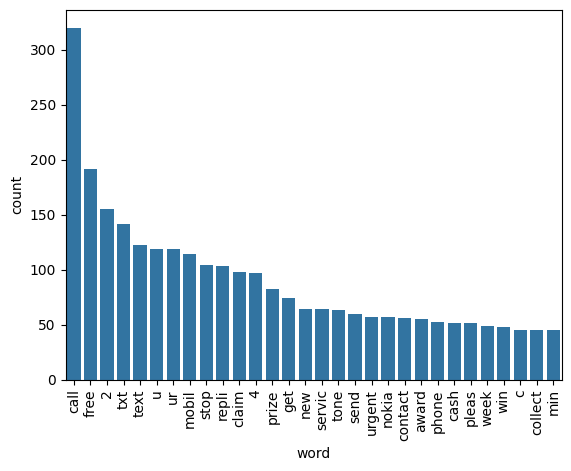

In [76]:
# most commonly used 30 words
common_words_df = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['word', 'count'])

# Plot the barplot
sns.barplot(data=common_words_df, x='word', y='count')
plt.xticks(rotation='vertical')  # Rotate x-axis labels
plt.show()

In [77]:
ham_corpus = []
for msg in df[df['Target'] == 0]['Transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [78]:
len(ham_corpus)

35404

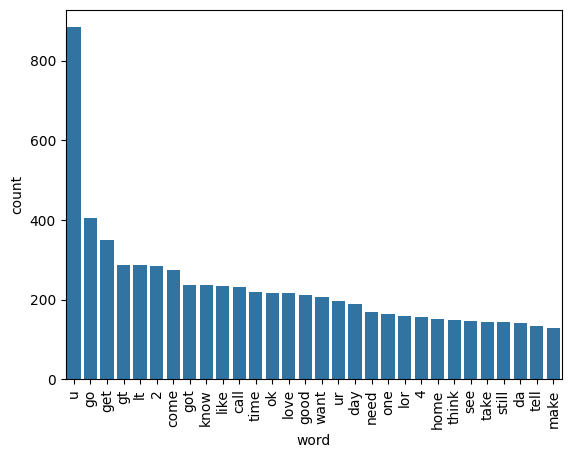

In [79]:
# most commonly used 30 words
common_words_df = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['word', 'count'])

# Plot the barplot
sns.barplot(data=common_words_df, x='word', y='count')
plt.xticks(rotation='vertical')  # Rotate x-axis labels
plt.show()

# Building Model

In [80]:
# firstly using navi bias algorithm

In [81]:
# vectorizing our data

In [82]:
from sklearn.feature_extraction.text import CountVectorizer

In [83]:
from sklearn.preprocessing import OneHotEncoder


In [84]:
cv = CountVectorizer()

In [85]:
X = cv.fit_transform(df['Transformed_text']).toarray()

In [86]:
y = df['Target'].values

In [87]:
from sklearn.model_selection import train_test_split

In [88]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [89]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

# Naive bayes

In [90]:
gnb = GaussianNB()
bnb = BernoulliNB()

In [91]:
# gausian navie b - used when the feature ( indepent variable ) are continous and are assumed to follw a normal curve
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315


In [92]:
# it is suitable for binary/ boolean features
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


# logistic regression

In [93]:
# Trying logistic regression

In [94]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(max_iter=5000, random_state=42)

In [95]:
LR.fit(X_train, y_train)

LogisticRegression(max_iter=5000, random_state=42)

In [96]:
y_pred = LR.predict(X_test)

In [97]:
# Calculate metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


In [98]:
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# Confusion matrix
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.9787234042553191
Precision: 0.9915254237288136
Recall: 0.8478260869565217
F1 Score: 0.9140625
[[895   1]
 [ 21 117]]


In [99]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization strength (l2)
    'solver': ['liblinear']  # Solvers for small or large datasets
}

# Initialize GridSearchCV
grid_search = GridSearchCV(LogisticRegression(max_iter=500, random_state=42), param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Best model
best_model = grid_search.best_estimator_


Best Parameters: {'C': 10, 'solver': 'liblinear'}


In [100]:
# Predict on the test set
y_pred = best_model.predict(X_test)

# Calculate accuracy, precision, and recall
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Print the results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)


Accuracy: 0.9816247582205029
Precision: 0.9917355371900827
Recall: 0.8695652173913043


In [101]:
import pickle
pickle.dump(cv,open('cv.pkl','wb'))
pickle.dump(best_model,open('BEST_MODEL.pkl','wb'))